In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [7]:
raw_data = pd.read_csv("C:/Users/risha/Documents/Learning new tech/DS_ML material/Datasets/weatherHistory.csv")
raw_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [8]:
raw_data.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


In [9]:
raw_data.columns.values

array(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'], dtype=object)

In [11]:
corr = raw_data.corr()

In [12]:
corr.style.background_gradient(cmap='RdBu_r')

C:\Users\risha\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1,0.992629,-0.632255,0.00895697,0.0299882,0.392847,nan,-0.00544711
Apparent Temperature (C),0.992629,1,-0.602571,-0.0566497,0.0290305,0.381718,nan,-0.000219
Humidity,-0.632255,-0.602571,1,-0.224951,0.000734645,-0.369173,nan,0.00545426
Wind Speed (km/h),0.00895697,-0.0566497,-0.224951,1,0.103822,0.100749,nan,-0.0492628
Wind Bearing (degrees),0.0299882,0.0290305,0.000734645,0.103822,1,0.0475942,nan,-0.0116509
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.0475942,1,nan,0.0598184
Loud Cover,nan,nan,nan,nan,nan,nan,nan,nan
Pressure (millibars),-0.00544711,-0.000219,0.00545426,-0.0492628,-0.0116509,0.0598184,nan,1


In [49]:
data = raw_data.drop(['Formatted Date', 'Precip Type', 'Loud Cover', 'Apparent Temperature (C)', 'Daily Summary'], axis = 1)
data.head()

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,8.755556,0.83,11.0446,259.0,15.8263,1016.51


In [50]:
data.describe(include='all')

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
unique,27,NaN,NaN,NaN,NaN,NaN,NaN
top,Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN
freq,31733,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.932678,0.734899,10.810640,187.509232,10.347325,1003.235956
std,NaN,9.551546,0.195473,6.913571,107.383428,4.192123,116.969906
min,NaN,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,4.688889,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,NaN,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,NaN,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000


In [51]:
data.isnull().sum()

Summary                   0
Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Pressure (millibars)      0
dtype: int64

In [52]:
data.corr()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,-0.632255,0.008957,0.029988,0.392847,-0.005447
Humidity,-0.632255,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,0.005454,-0.049263,-0.011651,0.059818,1.000000


In [54]:
data.columns.values

array(['Summary', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'], dtype=object)

In [56]:
data = data.drop(['Humidity'], axis = 1)
data.columns.values

array(['Summary', 'Temperature (C)', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'], dtype=object)

In [57]:
data.corr()

,Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.008957,0.029988,0.392847,-0.005447
Wind Speed (km/h),0.008957,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.049263,-0.011651,0.059818,1.000000


In [91]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1,0.009,0.03,0.39,-0.0054
Wind Speed (km/h),0.009,1,0.1,0.1,-0.049
Wind Bearing (degrees),0.03,0.1,1,0.048,-0.012
Visibility (km),0.39,0.1,0.048,1,0.06
Pressure (millibars),-0.0054,-0.049,-0.012,0.06,1


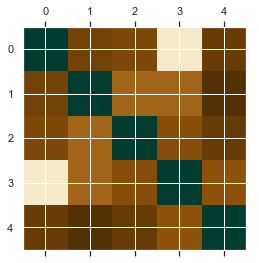

In [87]:
plt.matshow(data.corr(), cmap = 'BrBG')

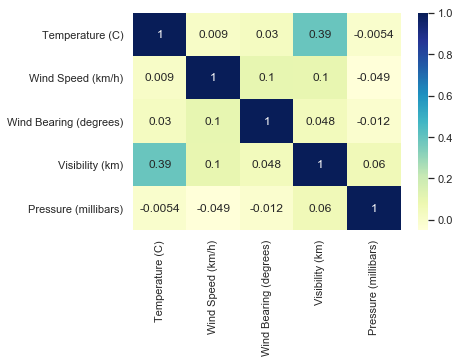

In [79]:
sns.heatmap(data.corr(), annot=True, cmap = 'YlGnBu')

In [90]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1,0.009,0.03,0.39,-0.0054
Wind Speed (km/h),0.009,1,0.1,0.1,-0.049
Wind Bearing (degrees),0.03,0.1,1,0.048,-0.012
Visibility (km),0.39,0.1,0.048,1,0.06
Pressure (millibars),-0.0054,-0.049,-0.012,0.06,1


In [2]:
data.shape

NameError: name 'data' is not defined